In [ ]:
import numpy as np
import matplotlib.pyplot as plt
input_ranges = {
    # more cost, and able to satisfy more demand
    'n_cars': range(0, 10001, 10),

    # time depends how many demand the cars are serving

    'weekday_starthour': range(0, 24),
    'weekday_startmin': range(0, 31, 30),
    'weekday_endhour': range(0, 24),
    'weekday_endmin': range(0, 31, 30),
    'holiday_starthour': range(0, 24),
    'holiday_startmin': range(0, 31, 30),
    'holiday_endhour': range(0, 24),
    'holiday_endmin': range(0, 31, 30),

    # more cost, but car can save charging time to serve more demand
    'charge_on_road': [True, False],

    # more cost, but can facilitate demand
    'service_lev': range(1, 11),

    # lead to lower demand
    'once_fare': range(0, 3001)  # yen
}

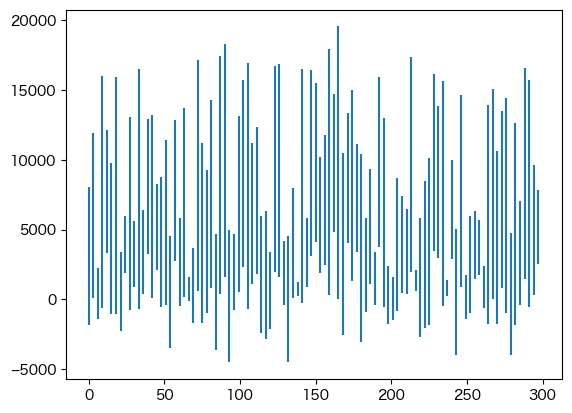

In [20]:
n = 100
data = []
y = []
for i in range(n):
    a = np.random.randint(0, 10001, 2)
    b = np.random.randint(0, 24, 2)
    data.append(a)
    data.append(b)
    y.append(a.mean())
    y.append(b.mean())

data = np.array(data).T

fit, ax = plt.subplots(1, 1)
ax.errorbar(x=sorted(np.hstack([np.arange(0, 3*n, 3), np.arange(1, 3*n+1, 3)])), 
                y=y, yerr=data, fmt='none', label='profit')
plt.show()

In [ ]:
sorted(np.hstack([np.arange(0, 3*n, 3), np.arange(1, 3*n+1, 3)]))

In [23]:
import numpy as np

profit_list = [np.array([1,5]), np.array([2,2.5]), np.array([10,12])]
bad_profit_list = ['bad_profit1', 'bad_profit2', 'bad_profit3']
y = ['y1', 'y2', 'y3']
bad_y = ['bad_y1', 'bad_y2', 'bad_y3']

# Combine the lists into a list of tuples
combined = list(zip(profit_list, bad_profit_list, y, bad_y))

# Sort the list of tuples based on the mean of the np.array in the first position
combined.sort(key=lambda x: np.mean(x[0]))

# Decompose the sorted list of tuples back into separate lists
profit_list, bad_profit_list, y, bad_y = zip(*combined)


In [24]:
y

('y2', 'y1', 'y3')

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import tqdm

need =pd.read_csv('trip_data.csv')
# print(need)
new_need = need.copy()['トリップ数'].to_numpy()

best_15 = 0
best_40 = 0
error_15 = 100
error_40 = 100
for sigma in tqdm(np.linspace(0,0.5,100)):
    k = np.random.normal(0, sigma, 50000)
    a = np.array([new_need*np.exp(k[i]) for i in range(50000)])

    error = abs(np.exp(k)-1).mean()
    if abs(error - 0.15)<abs(error_15-0.15):
        best_15 = sigma
        error_15 = error
    if abs(error - 0.4) < abs(error_40-0.4):
        best_40 = sigma
        error_40 = error



In [28]:
print(best_15, error_15)
print(best_40, error_40) 

0.18686868686868688 0.15029966698968864
0.4646464646464647 0.4015151823167369
